In [4]:
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the CSV files

In [8]:
# Files to load
city_data_to_load = os.path.join("Resources/city_data.csv")
ride_data_to_load = os.path.join("Resources/ride_data.csv")

In [11]:
# Read the CSV files
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [13]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Explore, inspect, clean data

## City Data DataFrame

In [17]:
# Get the columns and rows that are not null. 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [19]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [21]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [23]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [25]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [28]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

## Ride data DataFrame

In [30]:
# Get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [32]:
# Confirm absense of null values
ride_data_df.isnull().sum

<bound method DataFrame.sum of        city   date   fare  ride_id
0     False  False  False    False
1     False  False  False    False
2     False  False  False    False
3     False  False  False    False
4     False  False  False    False
...     ...    ...    ...      ...
2370  False  False  False    False
2371  False  False  False    False
2372  False  False  False    False
2373  False  False  False    False
2374  False  False  False    False

[2375 rows x 4 columns]>

In [35]:
# Get the data types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge DataFrames

In [38]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Create dataframes for each type of city

In [41]:
# Create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [44]:
# Create the suburban and rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


# Get the number of rides for each city type

In [49]:
# Get the number of rides for urban cities, suburban, and rural cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the average fare for each city type

In [52]:
# Get the average fare for each city in the urban, suburban, and rural cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Get the average number of drivers for each city

In [56]:
# Get the average number of drivers for each city in urban, suburban, and rural cities. 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Create Bubble Charts

Build scatter plots for each city type separately, and then combine all into one bubble chart.

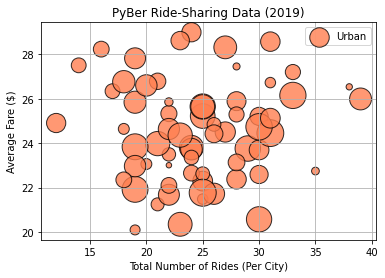

In [60]:
# Build the scatter plot for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, 
            c="coral",
           edgecolor="black", 
            linewidth=1,
            alpha=0.8, 
            label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()


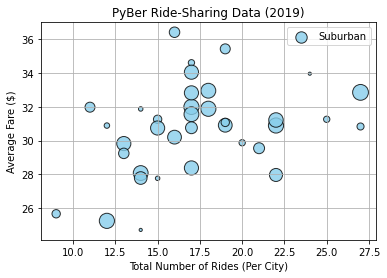

In [62]:
# Build the scatter plot for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add legend
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

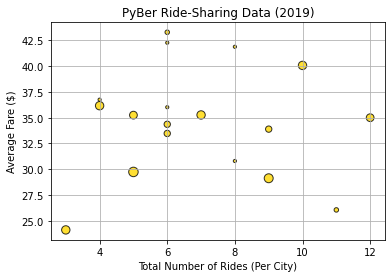

In [64]:
# Build the scatter plot for rural cities
plt.scatter (rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add legend
plt.legend

# Create a Bubble Chart for all cities

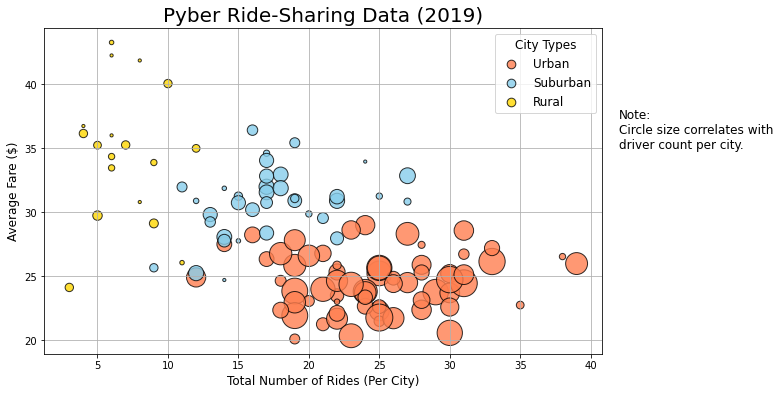

In [92]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare,
           s=10*urban_driver_count, 
            c="coral",
           edgecolor="black", 
            linewidth=1,
            alpha=0.8, 
            label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")

plt.scatter (rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")

# Incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates with \ndriver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()